In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from session15 import make_presentation, get_session15_endomaps

In [2]:
XG,YG = get_session15_endomaps()

In [3]:
X_pres,Y_pres = make_presentation(XG),make_presentation(YG)
print(X_pres)
print(Y_pres)

{'generators': ['X0', 'X1', 'X2', 'X3'], 'relations': [(('X0', 5), ('X0', 2)), (('X1', 1), ('X0', 2)), (('X2', 1), ('X0', 3)), (('X3', 2), ('X3', 0))]}
{'generators': ['Yp', 'Yq', 'Yz', 'Ym'], 'relations': [(('Yp', 6), ('Yp', 2)), (('Yq', 1), ('Yp', 1)), (('Yz', 4), ('Yz', 1)), (('Ym', 2), ('Ym', 0))]}


In [4]:
# maybe our sum is as easy as list concatenation
def presentation_sum(PA,PB):
    a_size,b_size = len(PA['generators']),len(PB['generators'])
    # hopefully this hashing guarantees uniqueness
    combined_generators = [
        "A_"+str(hash(a)) for a in PA['generators']
    ]+[
        "B_"+str(hash(b)) for b in PB['generators']
    ]
    print(combined_generators)
    assert len(combined_generators)==len(set(combined_generators))
    a_retraction = {k:v for k,v in zip(PA['generators'],range(a_size))}
    b_retraction = {
        k:v for k,v in zip(PB['generators'],[i+a_size for i in range(b_size)])
    }
    print(a_retraction)
    print(b_retraction)
    
    a_rels = [
        (
            (combined_generators[a_retraction[i[0][0]]],i[0][1]),
            (combined_generators[a_retraction[i[1][0]]],i[1][1])
        ) for i in PA['relations']
    ]
    b_rels = [
        (
            (combined_generators[b_retraction[i[0][0]]],i[0][1]),
            (combined_generators[b_retraction[i[1][0]]],i[1][1])
        ) for i in PB['relations']
    ]
    return {
        'generators':combined_generators,
        'relations':a_rels+b_rels,
        'injection_maps':[a_retraction,b_retraction]
    }
presentation_sum(X_pres,Y_pres)

['A_952857047755093302', 'A_-9002983780734811941', 'A_3469271698352597182', 'A_4892768212278947755', 'B_-4854919140967334395', 'B_3381055007253461380', 'B_-7931154846890151719', 'B_-8927160026403628522']
{'X0': 0, 'X1': 1, 'X2': 2, 'X3': 3}
{'Yp': 4, 'Yq': 5, 'Yz': 6, 'Ym': 7}


{'generators': ['A_952857047755093302',
  'A_-9002983780734811941',
  'A_3469271698352597182',
  'A_4892768212278947755',
  'B_-4854919140967334395',
  'B_3381055007253461380',
  'B_-7931154846890151719',
  'B_-8927160026403628522'],
 'relations': [(('A_952857047755093302', 5), ('A_952857047755093302', 2)),
  (('A_-9002983780734811941', 1), ('A_952857047755093302', 2)),
  (('A_3469271698352597182', 1), ('A_952857047755093302', 3)),
  (('A_4892768212278947755', 2), ('A_4892768212278947755', 0)),
  (('B_-4854919140967334395', 6), ('B_-4854919140967334395', 2)),
  (('B_3381055007253461380', 1), ('B_-4854919140967334395', 1)),
  (('B_-7931154846890151719', 4), ('B_-7931154846890151719', 1)),
  (('B_-8927160026403628522', 2), ('B_-8927160026403628522', 0))],
 'injection_maps': [{'X0': 0, 'X1': 1, 'X2': 2, 'X3': 3},
  {'Yp': 4, 'Yq': 5, 'Yz': 6, 'Ym': 7}]}

In [5]:
from session15 import reconstruct_endomap

In [6]:
pres_sum = presentation_sum(X_pres,Y_pres)
print(pres_sum)

['A_952857047755093302', 'A_-9002983780734811941', 'A_3469271698352597182', 'A_4892768212278947755', 'B_-4854919140967334395', 'B_3381055007253461380', 'B_-7931154846890151719', 'B_-8927160026403628522']
{'X0': 0, 'X1': 1, 'X2': 2, 'X3': 3}
{'Yp': 4, 'Yq': 5, 'Yz': 6, 'Ym': 7}
{'generators': ['A_952857047755093302', 'A_-9002983780734811941', 'A_3469271698352597182', 'A_4892768212278947755', 'B_-4854919140967334395', 'B_3381055007253461380', 'B_-7931154846890151719', 'B_-8927160026403628522'], 'relations': [(('A_952857047755093302', 5), ('A_952857047755093302', 2)), (('A_-9002983780734811941', 1), ('A_952857047755093302', 2)), (('A_3469271698352597182', 1), ('A_952857047755093302', 3)), (('A_4892768212278947755', 2), ('A_4892768212278947755', 0)), (('B_-4854919140967334395', 6), ('B_-4854919140967334395', 2)), (('B_3381055007253461380', 1), ('B_-4854919140967334395', 1)), (('B_-7931154846890151719', 4), ('B_-7931154846890151719', 1)), (('B_-8927160026403628522', 2), ('B_-892716002640362

In [7]:
sum_graph = reconstruct_endomap(pres_sum)
print(sum_graph)

{'map_by_name': {'A_952857047755093302': 'sA_952857047755093302', 'sA_952857047755093302': 'ssA_952857047755093302', 'ssA_952857047755093302': 'sssA_952857047755093302', 'sssA_952857047755093302': 'ssssA_952857047755093302', 'ssssA_952857047755093302': 'ssA_952857047755093302', 'A_-9002983780734811941': 'ssA_952857047755093302', 'A_3469271698352597182': 'sssA_952857047755093302', 'A_4892768212278947755': 'sA_4892768212278947755', 'sA_4892768212278947755': 'A_4892768212278947755', 'B_-4854919140967334395': 'sB_-4854919140967334395', 'sB_-4854919140967334395': 'ssB_-4854919140967334395', 'ssB_-4854919140967334395': 'sssB_-4854919140967334395', 'sssB_-4854919140967334395': 'ssssB_-4854919140967334395', 'ssssB_-4854919140967334395': 'sssssB_-4854919140967334395', 'sssssB_-4854919140967334395': 'ssB_-4854919140967334395', 'B_3381055007253461380': 'sB_-4854919140967334395', 'B_-7931154846890151719': 'sB_-7931154846890151719', 'sB_-7931154846890151719': 'ssB_-7931154846890151719', 'ssB_-79311

In [8]:
S_G = nx.DiGraph({k:[v] for k,v in zip(sum_graph['map_by_name'].keys(),sum_graph['map_by_name'].values())})

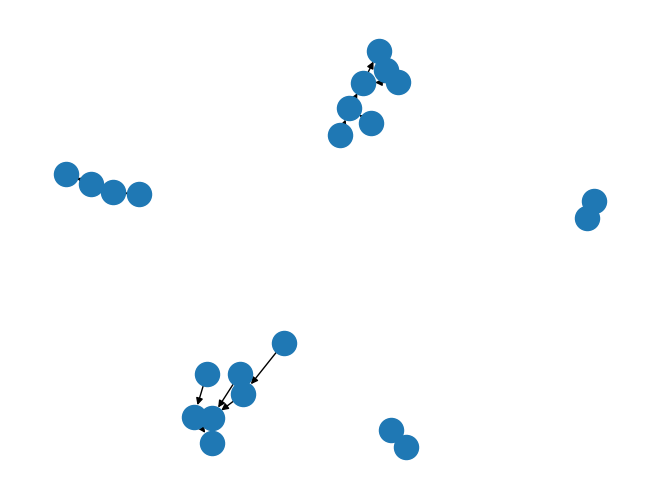

In [9]:
nx.draw(S_G)

In [10]:
len(S_G.nodes)

22

In [11]:
len(XG.nodes)+len(YG.nodes)

22

In [12]:
len(sum_graph['map_by_name'])

22

In [13]:
# OKAY! That's what it should look like

In [14]:
# in session 21, I wrote out a graph product function
# let's generalize it to work with generic graphs
def graph_product(A,B):
    nodes = []
    edges = []

    a_pos = {}
    b_pos = {}
    c_pos = {}
    
    for i,a in enumerate(A):
        a_next = list(A.successors(a))
        a_pos[a] = (0,i)

        for j,b in enumerate(B):
            b_next = list(B.successors(b))
            b_pos[b] = (j,0)
            nodes.append(str([a,b]))
            for b_i in b_next:
                if len(a_next):
                    for a_i in a_next:
                        edges.append((str([a,b]),str([a_i,b_i])))
                else:
                    edges.append((str([a,b]),str([a,b_i])))
            c_pos[str([a,b])] = (j+1,i+1)
                    
    print(nodes)
    print(edges)

    print(c_pos)
    
    C = nx.DiGraph()
    C.add_nodes_from(nodes)
    C.add_edges_from(edges)
    fig, all_axes = plt.subplots(2, 2)
    ax = all_axes.flat

    nx.draw_shell(A, ax=ax[0], with_labels=True, font_weight='bold')

    nx.draw_planar(C, ax=ax[1], with_labels=True, font_weight='bold')

    nx.draw_shell(B, ax=ax[3], with_labels=True, font_weight='bold')
    ax[2].axis('off')
    plt.show()
    
    return C

["['X0', 'Yp']", "['X0', 'Yq']", "['X0', 'Yr']", "['X0', 'Ys']", "['X0', 'Yt']", "['X0', 'Yv']", "['X0', 'Yu']", "['X0', 'Ym']", "['X0', 'Yl']", "['X0', 'Yw']", "['X0', 'Yx']", "['X0', 'Yy']", "['X0', 'Yz']", "['X1', 'Yp']", "['X1', 'Yq']", "['X1', 'Yr']", "['X1', 'Ys']", "['X1', 'Yt']", "['X1', 'Yv']", "['X1', 'Yu']", "['X1', 'Ym']", "['X1', 'Yl']", "['X1', 'Yw']", "['X1', 'Yx']", "['X1', 'Yy']", "['X1', 'Yz']", "['X2', 'Yp']", "['X2', 'Yq']", "['X2', 'Yr']", "['X2', 'Ys']", "['X2', 'Yt']", "['X2', 'Yv']", "['X2', 'Yu']", "['X2', 'Ym']", "['X2', 'Yl']", "['X2', 'Yw']", "['X2', 'Yx']", "['X2', 'Yy']", "['X2', 'Yz']", "['X3', 'Yp']", "['X3', 'Yq']", "['X3', 'Yr']", "['X3', 'Ys']", "['X3', 'Yt']", "['X3', 'Yv']", "['X3', 'Yu']", "['X3', 'Ym']", "['X3', 'Yl']", "['X3', 'Yw']", "['X3', 'Yx']", "['X3', 'Yy']", "['X3', 'Yz']", "['X4', 'Yp']", "['X4', 'Yq']", "['X4', 'Yr']", "['X4', 'Ys']", "['X4', 'Yt']", "['X4', 'Yv']", "['X4', 'Yu']", "['X4', 'Ym']", "['X4', 'Yl']", "['X4', 'Yw']", "['X4',

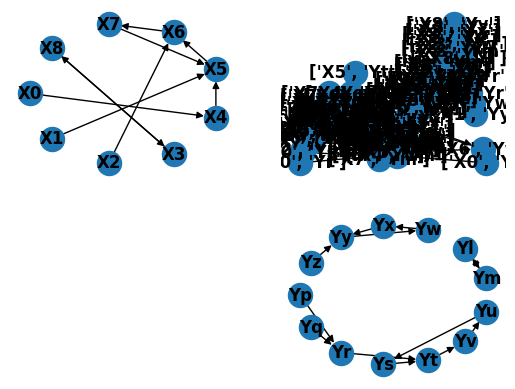

In [15]:
XY_prod = graph_product(XG,YG)

In [16]:
# lets see what it's presentation looks like:
XY_prod_pres = make_presentation(XY_prod)
print(XY_prod_pres)

{'generators': ["['X0', 'Yp']", "['X0', 'Yq']", "['X0', 'Yr']", "['X0', 'Ys']", "['X0', 'Yt']", "['X0', 'Yv']", "['X0', 'Yu']", "['X0', 'Ym']", "['X0', 'Yl']", "['X0', 'Yw']", "['X0', 'Yx']", "['X0', 'Yy']", "['X0', 'Yz']", "['X1', 'Yp']", "['X1', 'Yq']", "['X1', 'Yr']", "['X1', 'Ys']", "['X1', 'Yt']", "['X1', 'Yv']", "['X1', 'Yu']", "['X1', 'Ym']", "['X1', 'Yl']", "['X1', 'Yw']", "['X1', 'Yx']", "['X1', 'Yy']", "['X1', 'Yz']", "['X2', 'Yp']", "['X2', 'Yq']", "['X2', 'Yr']", "['X2', 'Ys']", "['X2', 'Yt']", "['X2', 'Yv']", "['X2', 'Yu']", "['X2', 'Ym']", "['X2', 'Yl']", "['X2', 'Yw']", "['X2', 'Yx']", "['X2', 'Yy']", "['X2', 'Yz']", "['X3', 'Yp']", "['X3', 'Yq']", "['X3', 'Yz']", "['X4', 'Yp']", "['X4', 'Yq']", "['X4', 'Yz']", "['X5', 'Yp']", "['X5', 'Yq']", "['X5', 'Yz']", "['X6', 'Yp']", "['X6', 'Yq']", "['X6', 'Yz']", "['X7', 'Yp']", "['X7', 'Yq']", "['X7', 'Yz']", "['X8', 'Yp']", "['X8', 'Yq']", "['X8', 'Yz']", "['X3', 'Ym']", "['X3', 'Yl']"], 'relations': [(("['X0', 'Yp']", 14), ("

In [17]:
from session15 import standardize_presentation

In [18]:
standardize_presentation(XY_prod_pres)

{'generator_count': 59,
 'generators': ["['X0', 'Yp']",
  "['X0', 'Yq']",
  "['X0', 'Yr']",
  "['X0', 'Ys']",
  "['X0', 'Yt']",
  "['X0', 'Yv']",
  "['X0', 'Yu']",
  "['X0', 'Ym']",
  "['X0', 'Yl']",
  "['X0', 'Yw']",
  "['X0', 'Yx']",
  "['X0', 'Yy']",
  "['X0', 'Yz']",
  "['X1', 'Yp']",
  "['X1', 'Yq']",
  "['X1', 'Yr']",
  "['X1', 'Ys']",
  "['X1', 'Yt']",
  "['X1', 'Yv']",
  "['X1', 'Yu']",
  "['X1', 'Ym']",
  "['X1', 'Yl']",
  "['X1', 'Yw']",
  "['X1', 'Yx']",
  "['X1', 'Yy']",
  "['X1', 'Yz']",
  "['X2', 'Yp']",
  "['X2', 'Yq']",
  "['X2', 'Yr']",
  "['X2', 'Ys']",
  "['X2', 'Yt']",
  "['X2', 'Yv']",
  "['X2', 'Yu']",
  "['X2', 'Ym']",
  "['X2', 'Yl']",
  "['X2', 'Yw']",
  "['X2', 'Yx']",
  "['X2', 'Yy']",
  "['X2', 'Yz']",
  "['X3', 'Yp']",
  "['X3', 'Yq']",
  "['X3', 'Yz']",
  "['X4', 'Yp']",
  "['X4', 'Yq']",
  "['X4', 'Yz']",
  "['X5', 'Yp']",
  "['X5', 'Yq']",
  "['X5', 'Yz']",
  "['X6', 'Yp']",
  "['X6', 'Yq']",
  "['X6', 'Yz']",
  "['X7', 'Yp']",
  "['X7', 'Yq']",
  "['X7'

In [19]:
# well, that's interesting let's compare
# I wonder if the "max_depth" being 14 is significant
# that was the answer I was supposed to get in Session 15
standardize_presentation(X_pres)

{'generator_count': 4,
 'generators': ['X0', 'X1', 'X2', 'X3'],
 'substitutions': {15: 3, 4: 3, 8: 6, 18: 9},
 'relation_pairs': {15: ('X0', 5),
  3: ('X0', 2),
  4: ('X1', 1),
  8: ('X2', 1),
  6: ('X0', 3),
  18: ('X3', 2),
  9: ('X3', 0)},
 'max_depth': 5,
 'max_steps': 18}

In [20]:
standardize_presentation(Y_pres)

{'generator_count': 4,
 'generators': ['Yp', 'Yq', 'Yz', 'Ym'],
 'substitutions': {21: 3, 4: 1, 23: 8, 18: 9},
 'relation_pairs': {21: ('Yp', 6),
  3: ('Yp', 2),
  4: ('Yq', 1),
  1: ('Yp', 1),
  23: ('Yz', 4),
  8: ('Yz', 1),
  18: ('Ym', 2),
  9: ('Ym', 0)},
 'max_depth': 6,
 'max_steps': 23}

In [21]:
X_pres

{'generators': ['X0', 'X1', 'X2', 'X3'],
 'relations': [(('X0', 5), ('X0', 2)),
  (('X1', 1), ('X0', 2)),
  (('X2', 1), ('X0', 3)),
  (('X3', 2), ('X3', 0))]}

In [22]:
Y_pres

{'generators': ['Yp', 'Yq', 'Yz', 'Ym'],
 'relations': [(('Yp', 6), ('Yp', 2)),
  (('Yq', 1), ('Yp', 1)),
  (('Yz', 4), ('Yz', 1)),
  (('Ym', 2), ('Ym', 0))]}

In [23]:
XY_prod_pres

{'generators': ["['X0', 'Yp']",
  "['X0', 'Yq']",
  "['X0', 'Yr']",
  "['X0', 'Ys']",
  "['X0', 'Yt']",
  "['X0', 'Yv']",
  "['X0', 'Yu']",
  "['X0', 'Ym']",
  "['X0', 'Yl']",
  "['X0', 'Yw']",
  "['X0', 'Yx']",
  "['X0', 'Yy']",
  "['X0', 'Yz']",
  "['X1', 'Yp']",
  "['X1', 'Yq']",
  "['X1', 'Yr']",
  "['X1', 'Ys']",
  "['X1', 'Yt']",
  "['X1', 'Yv']",
  "['X1', 'Yu']",
  "['X1', 'Ym']",
  "['X1', 'Yl']",
  "['X1', 'Yw']",
  "['X1', 'Yx']",
  "['X1', 'Yy']",
  "['X1', 'Yz']",
  "['X2', 'Yp']",
  "['X2', 'Yq']",
  "['X2', 'Yr']",
  "['X2', 'Ys']",
  "['X2', 'Yt']",
  "['X2', 'Yv']",
  "['X2', 'Yu']",
  "['X2', 'Ym']",
  "['X2', 'Yl']",
  "['X2', 'Yw']",
  "['X2', 'Yx']",
  "['X2', 'Yy']",
  "['X2', 'Yz']",
  "['X3', 'Yp']",
  "['X3', 'Yq']",
  "['X3', 'Yz']",
  "['X4', 'Yp']",
  "['X4', 'Yq']",
  "['X4', 'Yz']",
  "['X5', 'Yp']",
  "['X5', 'Yq']",
  "['X5', 'Yz']",
  "['X6', 'Yp']",
  "['X6', 'Yq']",
  "['X6', 'Yz']",
  "['X7', 'Yp']",
  "['X7', 'Yq']",
  "['X7', 'Yz']",
  "['X8', 'Yp'

In [24]:
# observations:
#   I thought that the generators of my product be products of generators,
#    but it looks like my code turned each pair of points into a generator?
# and what's the relationship between relations?
print(X_pres['relations'][0])
print(Y_pres['relations'][0])
print(XY_prod_pres['relations'][0])
# maybe something to do with the cycle length and shared offset?
C_X = (X_pres['relations'][0][0][1]-X_pres['relations'][0][1][1])
C_Y = (Y_pres['relations'][0][0][1]-Y_pres['relations'][0][1][1])
print(C_X*C_Y+2)


(('X0', 5), ('X0', 2))
(('Yp', 6), ('Yp', 2))
(("['X0', 'Yp']", 14), ("['X0', 'Yp']", 2))
14


In [25]:
print(len(X_pres['relations']))
print(len(Y_pres['relations']))
print(len(XY_prod_pres['relations']))

4
4
59


In [26]:
print(len(X_pres['generators']))
print(len(Y_pres['generators']))
print(len(XY_prod_pres['generators']))

4
4
59


In [27]:
def make_relation_dict(pres):
    output = {}
    for g in pres['generators']:
        output[g] = list(filter(
            lambda x: x[0][0]==g or x[1][0]==g,
            pres['relations']
        ))
    return output


In [28]:
make_relation_dict(X_pres)

{'X0': [(('X0', 5), ('X0', 2)),
  (('X1', 1), ('X0', 2)),
  (('X2', 1), ('X0', 3))],
 'X1': [(('X1', 1), ('X0', 2))],
 'X2': [(('X2', 1), ('X0', 3))],
 'X3': [(('X3', 2), ('X3', 0))]}

In [29]:
make_relation_dict(Y_pres)

{'Yp': [(('Yp', 6), ('Yp', 2)), (('Yq', 1), ('Yp', 1))],
 'Yq': [(('Yq', 1), ('Yp', 1))],
 'Yz': [(('Yz', 4), ('Yz', 1))],
 'Ym': [(('Ym', 2), ('Ym', 0))]}

In [30]:
print([len(x) for x in make_relation_dict(XY_prod_pres).values()])

[19, 1, 2, 1, 1, 1, 1, 6, 1, 6, 5, 5, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]


In [31]:
print(len(XG.nodes()))
print(len(YG.nodes()))
print(len(XY_prod.nodes()))


9
13
117


In [32]:
9*13

117

In [33]:
(9*13+1)/2

59.0

In [34]:
# and that's my number of nodes in the product?
# seems like a large coincidence


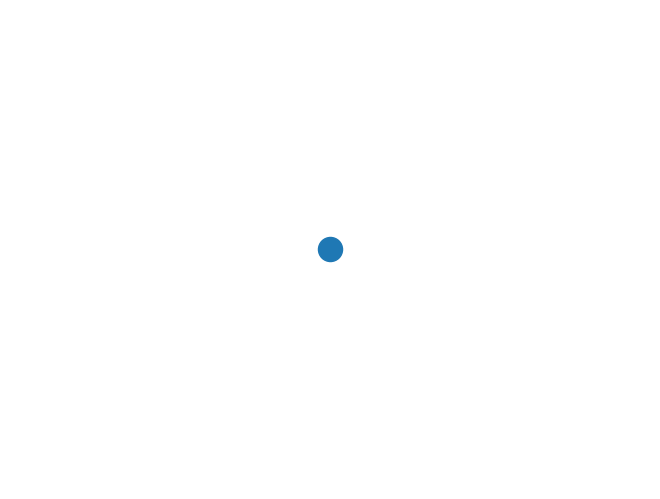

In [35]:
# let's double back and check some work
naked_dot = nx.DiGraph({"D":[]})
nx.draw(naked_dot)



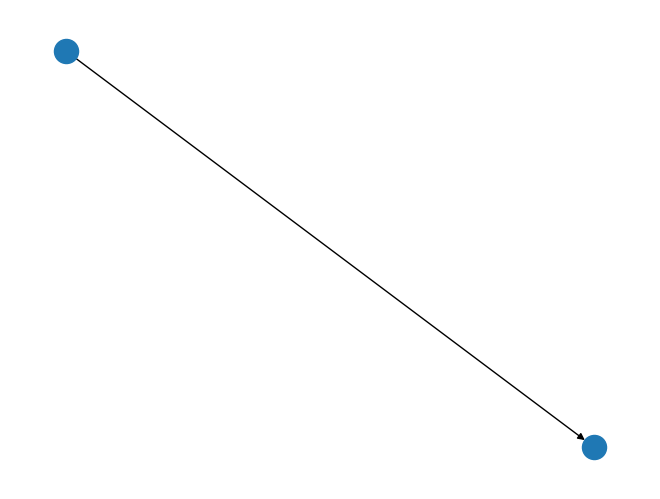

In [36]:
naked_arrow = nx.DiGraph({"S":["T"],"T":[]})
nx.draw(naked_arrow)

["['D', 'S']", "['D', 'T']"]
[("['D', 'S']", "['D', 'T']")]
{"['D', 'S']": (1, 1), "['D', 'T']": (2, 1)}


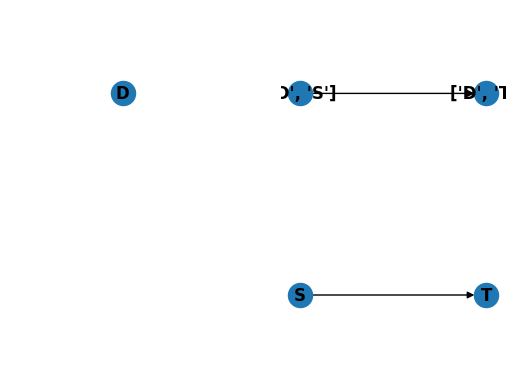

In [37]:
graph_product(naked_dot,naked_arrow)

["['S', 'D']", "['T', 'D']"]
[]
{"['S', 'D']": (1, 1), "['T', 'D']": (1, 2)}


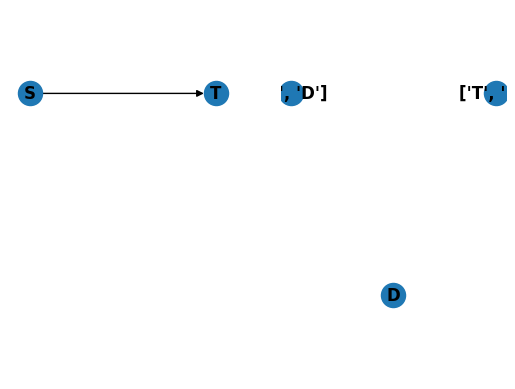

In [38]:
graph_product(naked_arrow,naked_dot)

["['D', 'D']"]
[]
{"['D', 'D']": (1, 1)}


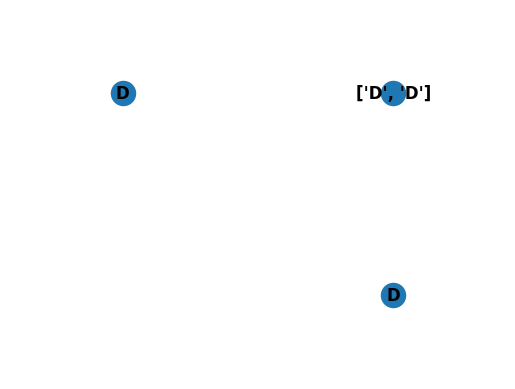

In [39]:
graph_product(naked_dot,naked_dot)

In [40]:
# lets define a graph sum also
def graph_sum(GA,GB):
    a_size,b_size = len(GA.nodes),len(GB.nodes)
    print(a_size)
    print(b_size)
    
    # hopefully this hashing guarantees uniqueness
    combined_nodes = [
        "A_"+str(hash(a)) for a in GA.nodes
    ]+[
        "B_"+str(hash(b)) for b in GB.nodes
    ]
    print(combined_nodes)
    assert len(combined_nodes)==len(set(combined_nodes))
    a_retraction = {k:v for k,v in zip(GA.nodes,range(a_size))}
    b_retraction = {
        k:v for k,v in zip(GA.nodes,[i+a_size for i in range(b_size)])
    }
    print(a_retraction)
    print(b_retraction)
    print(GA.edges)
    a_edges = [
        (combined_nodes[a_retraction[i[0]]],
         combined_nodes[a_retraction[i[1]]]
        ) for i in GA.edges
    ]
    print(a_edges)
    b_edges = [
        (
            combined_nodes[b_retraction[i[0]]],
            combined_nodes[b_retraction[i[1]]]
        ) for i in GB.edges
    ]
    output = nx.DiGraph()
    output.add_nodes_from(combined_nodes)
    output.add_edges_from(a_edges+b_edges)
    return output

1
1
['A_-5488552147440578048', 'B_-5488552147440578048']
{'D': 0}
{'D': 1}
[]
[]


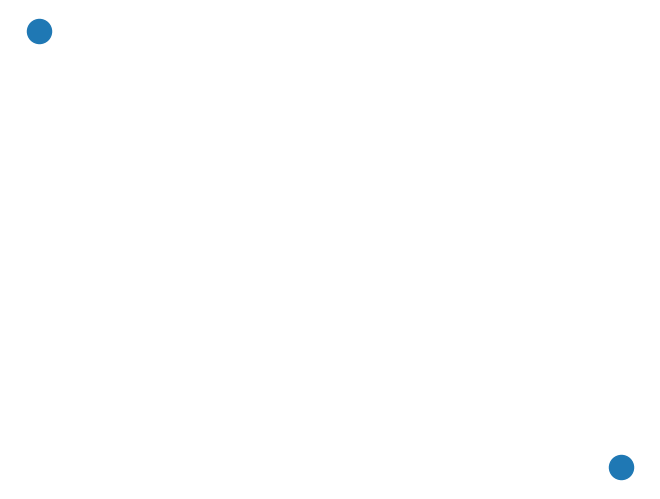

In [41]:
nx.draw(graph_sum(naked_dot,naked_dot))

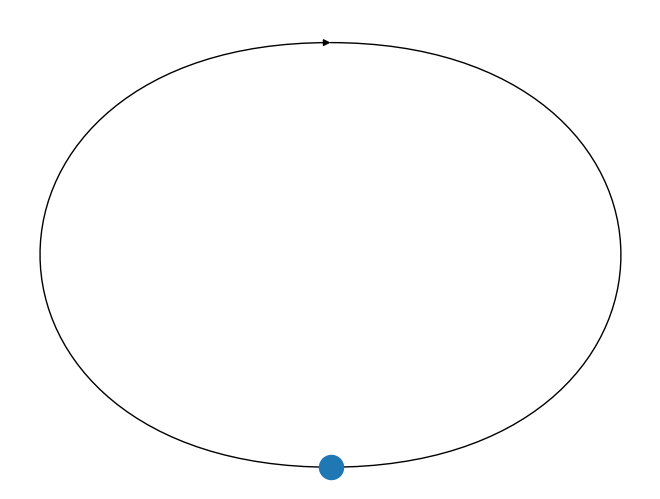

In [42]:
naked_loop = nx.DiGraph(nx.DiGraph({"L":["L"]}))
nx.draw(naked_loop)

1
1
['A_-5943183360831570843', 'B_-5943183360831570843']
{'L': 0}
{'L': 1}
[('L', 'L')]
[('A_-5943183360831570843', 'A_-5943183360831570843')]


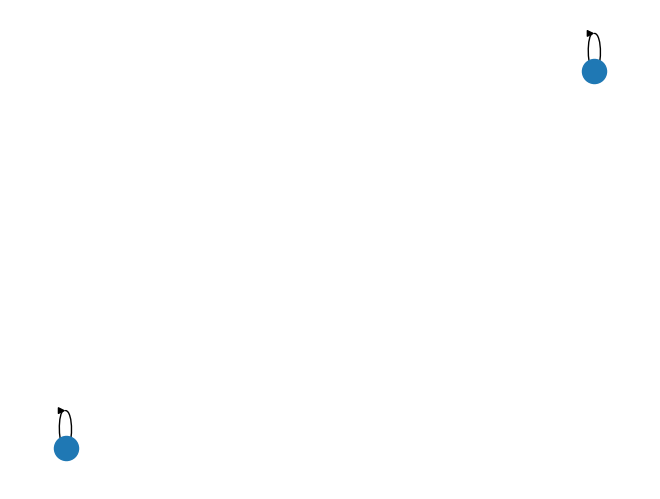

In [43]:
S_2 = graph_sum(naked_loop,naked_loop)
nx.draw(S_2)

["['A_-5943183360831570843', 'D']", "['B_-5943183360831570843', 'D']"]
[]
{"['A_-5943183360831570843', 'D']": (1, 1), "['B_-5943183360831570843', 'D']": (1, 2)}


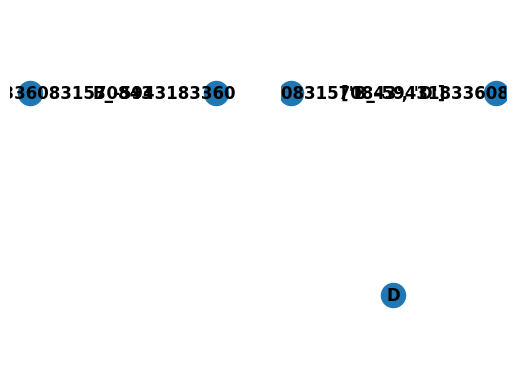

In [44]:
D_2 = graph_product(S_2,naked_dot)

["['D', 'A_-5943183360831570843']", "['D', 'B_-5943183360831570843']"]
[("['D', 'A_-5943183360831570843']", "['D', 'A_-5943183360831570843']"), ("['D', 'B_-5943183360831570843']", "['D', 'B_-5943183360831570843']")]
{"['D', 'A_-5943183360831570843']": (1, 1), "['D', 'B_-5943183360831570843']": (2, 1)}


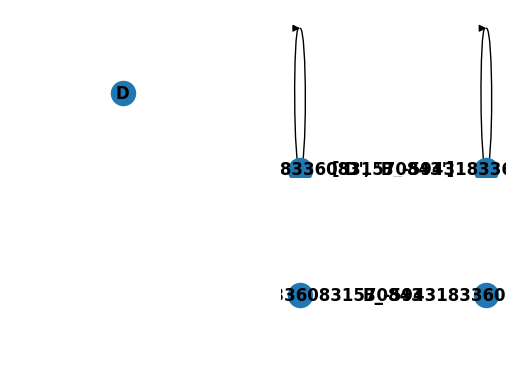

In [45]:
graph_product(naked_dot,S_2)

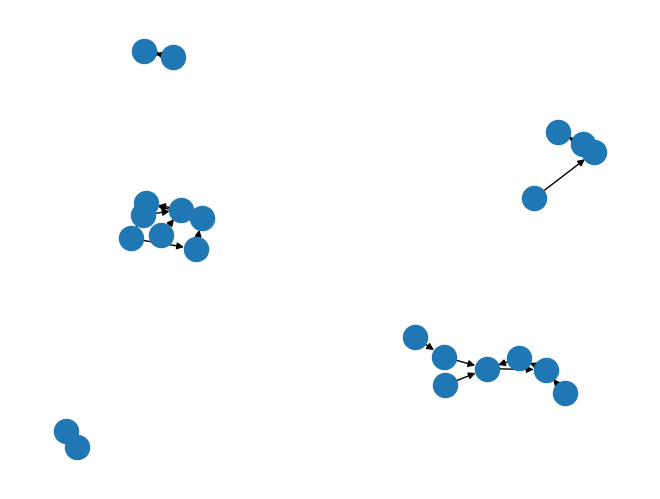

In [46]:
# so there mights a problem with my graph product
# namely, it's non-commutative when it should commute
# lets see if we can find the sum and product another way

# the sum can be thought of by stacking adjacency matrices
# along the diagonal
def graph_sum(A,B):
    MA,MB = nx.to_numpy_array(A),nx.to_numpy_array(B)
    MA_pad = np.pad(MA,(0,MB.shape[0]))
    MB_pad = np.pad(MB,(MA.shape[0],0))
    return nx.from_numpy_array(MA_pad+MB_pad,create_using=nx.DiGraph)
XY_sum = graph_sum(XG,YG)
nx.draw(XY_sum)

Nodes = 9 x 13 -> 117
(117, 22)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
(117, 117)
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


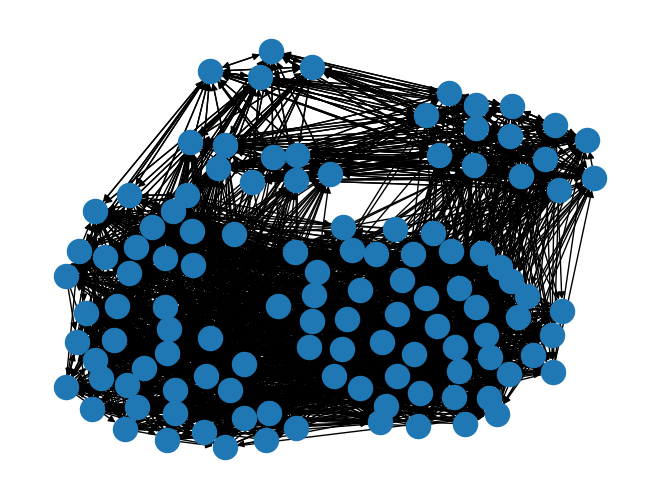

In [47]:

def graph_product(A,B):
    # for our product, the nodes are pairs of nodes
    a_size,b_size = len(A.nodes),len(B.nodes)
    new_size = a_size*b_size
    print(f"Nodes = {a_size} x {b_size} -> {new_size}")
    # there is exactly one map from the sum
    MA,MB = nx.to_numpy_array(A),nx.to_numpy_array(B)
    MA_pad = np.pad(MA,(0,MB.shape[0]))
    MB_pad = np.pad(MB,(MA.shape[0],0))
    M_sum = MA_pad+MB_pad 
    old_size = M_sum.shape[0]
    # so there should be a unique map from the
    # product of nodes to the sum
    trans_rows = []
    for i in range(a_size):
        for j in range(b_size):
            k = i * b_size + j
            v = np.zeros((old_size,))
            v[i] = 1
            v[j+a_size] = 1
            trans_rows.append(v)
    trans_M = np.array(trans_rows)
    print(trans_M.shape)
    print(trans_M)

    comp_M = trans_M @ M_sum @ trans_M.T
    print(comp_M.shape)
    print(comp_M)
    
    return nx.from_numpy_array(comp_M,create_using=nx.DiGraph)

nx.draw(graph_product(XG,YG))

Nodes = 1 x 2 -> 2
(2, 3)
[[1. 1. 0.]
 [1. 0. 1.]]
(2, 2)
[[1. 2.]
 [1. 1.]]


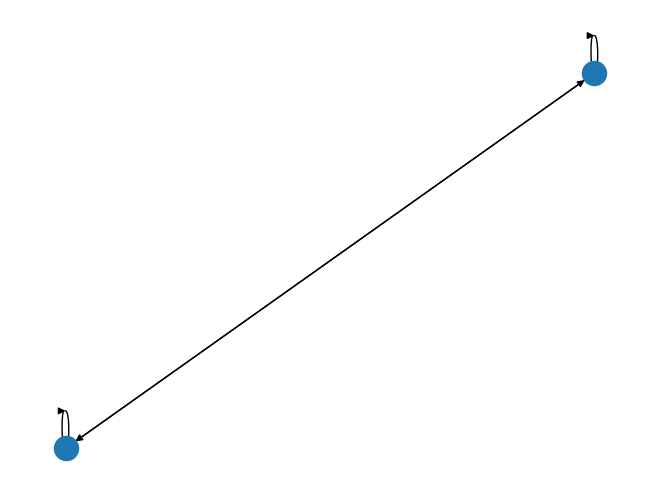

In [48]:
nx.draw(graph_product(naked_loop,naked_arrow))

In [49]:
# let's get a new presentation
XY_prod = graph_product(XG,YG)
XY_pres = make_presentation(XY_prod)

Nodes = 9 x 13 -> 117
(117, 22)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
(117, 117)
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [50]:
print(XY_pres)

{'generators': [0, 1, 12, 13, 14, 25, 26, 27, 38], 'relations': [((0, 6), (0, 2)), ((1, 1), (0, 1)), ((12, 4), (12, 1)), ((13, 1), (0, 1)), ((14, 1), (0, 1)), ((25, 1), (12, 1)), ((26, 1), (0, 1)), ((27, 1), (0, 1)), ((38, 1), (12, 1))]}


In [51]:
from session15 import make_cycle

make_cycle(3)

Nodes = 2 x 3 -> 6
(6, 5)
[[1. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0.]
 [0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 1.]]
(6, 6)
[[0. 1. 0. 1. 2. 1.]
 [0. 0. 1. 1. 1. 2.]
 [1. 0. 0. 2. 1. 1.]
 [1. 2. 1. 0. 1. 0.]
 [1. 1. 2. 0. 0. 1.]
 [2. 1. 1. 1. 0. 0.]]


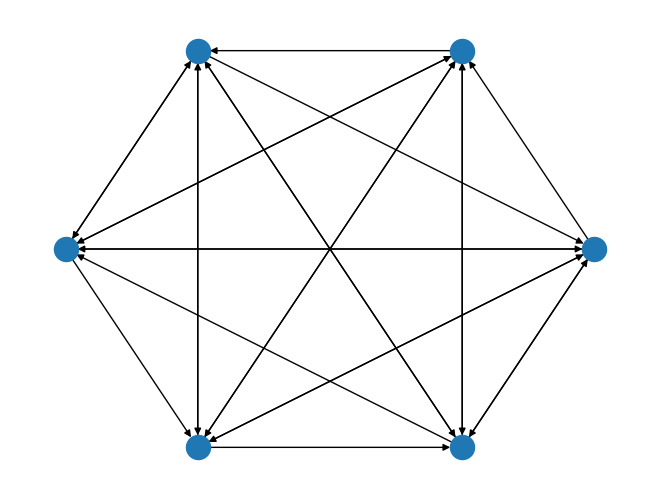

In [52]:
nx.draw_shell(graph_product(make_cycle(2),make_cycle(3)))

Nodes = 2 x 2 -> 4
(4, 4)
[[1. 0. 1. 0.]
 [1. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]]
(4, 4)
[[0. 1. 1. 2.]
 [1. 0. 2. 1.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]]


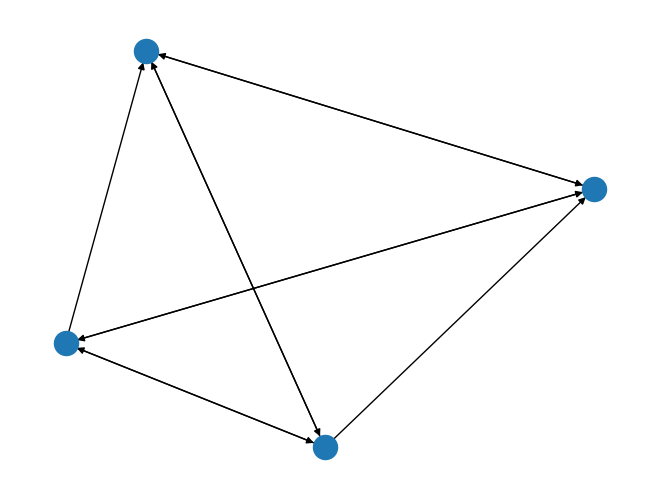

In [53]:
nx.draw(graph_product(naked_arrow,make_cycle(2)))

Nodes = 2 x 1 -> 2
(2, 3)
[[1. 0. 1.]
 [0. 1. 1.]]
(2, 2)
[[1. 0.]
 [0. 1.]]


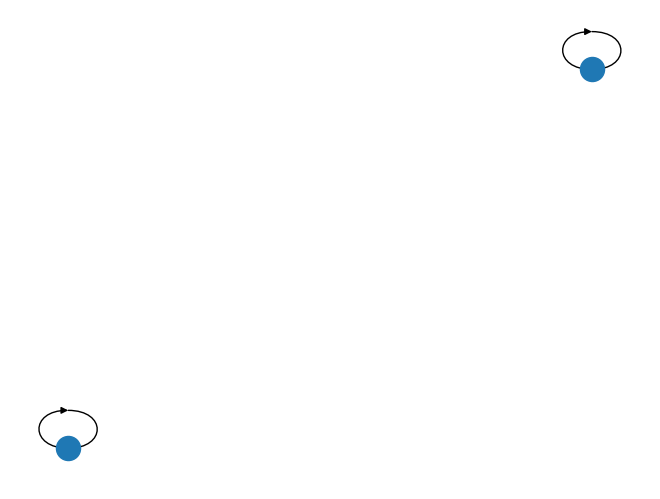

In [54]:
nx.draw(graph_product(S_2,naked_dot))

Nodes = 1 x 2 -> 2
(2, 3)
[[1. 1. 0.]
 [1. 0. 1.]]
(2, 2)
[[1. 0.]
 [0. 1.]]


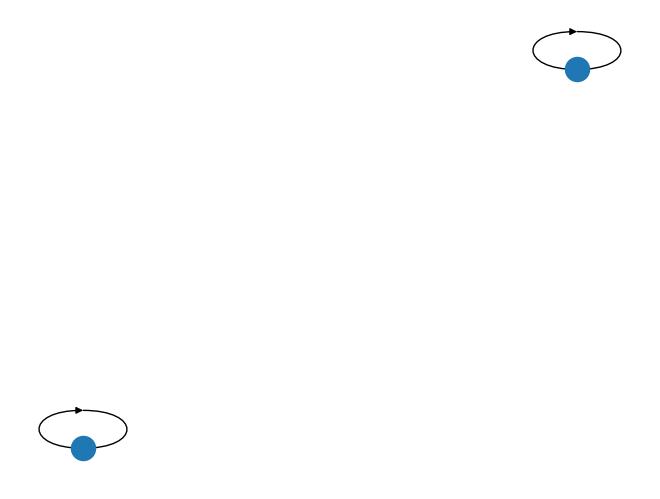

In [55]:
nx.draw(graph_product(naked_dot,S_2))

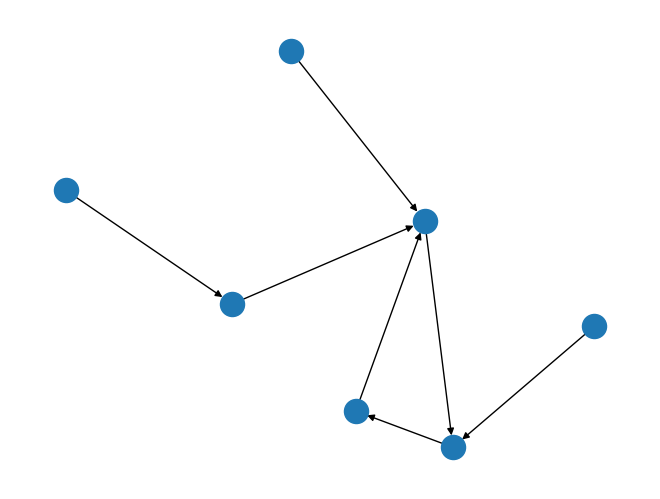

In [56]:
# well, at least my product commutes now
# let's try working with some smaller objects
GX_A = nx.DiGraph()
GX_A.add_nodes_from(range(7))
GX_A.add_edges_from([(0,1),(1,2),(2,3),(3,4),(4,2),(5,2),(6,3)])
nx.draw(GX_A)


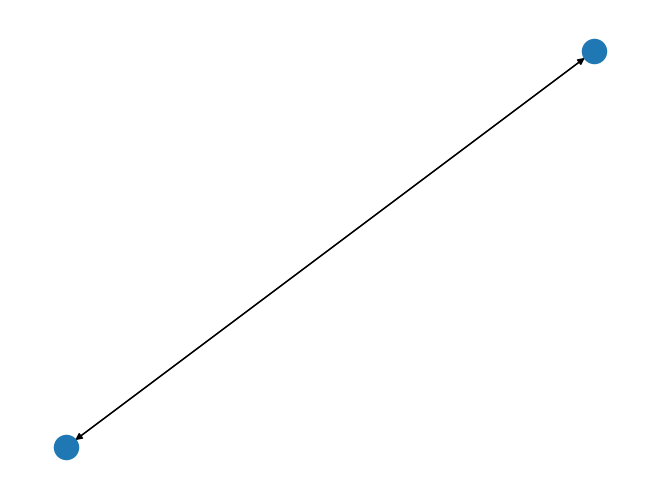

In [57]:
C_2 = make_cycle(2)
nx.draw(C_2)

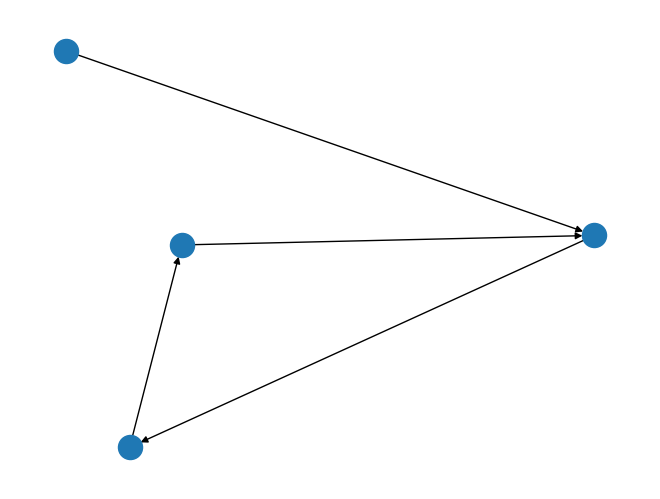

In [58]:
GY_A = nx.DiGraph()
GY_A.add_nodes_from(range(4))
GY_A.add_edges_from([(0,1),(1,2),(2,3),(3,1)])
nx.draw(GY_A)

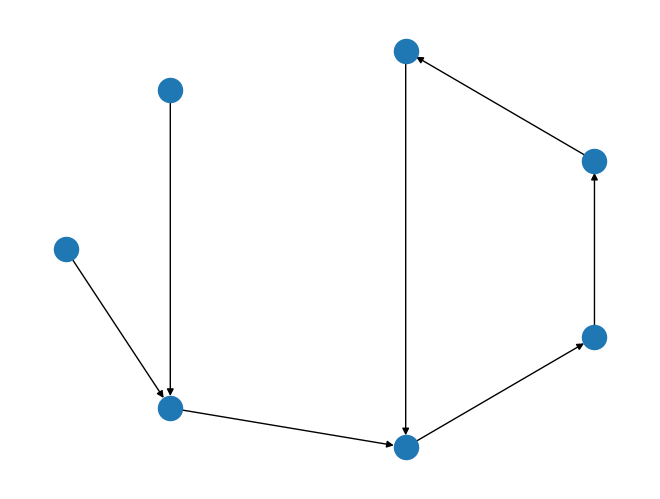

In [59]:
GY_B = nx.DiGraph()
GY_B.add_nodes_from(range(7))
GY_B.add_edges_from([(0,1),(1,2),(2,3),(3,4),(4,5),(5,2),(6,1)])
nx.draw_shell(GY_B)

Nodes = 2 x 2 -> 4
(4, 4)
[[1. 0. 1. 0.]
 [1. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]]
(4, 4)
[[0. 1. 1. 2.]
 [1. 0. 2. 1.]
 [1. 2. 0. 1.]
 [2. 1. 1. 0.]]


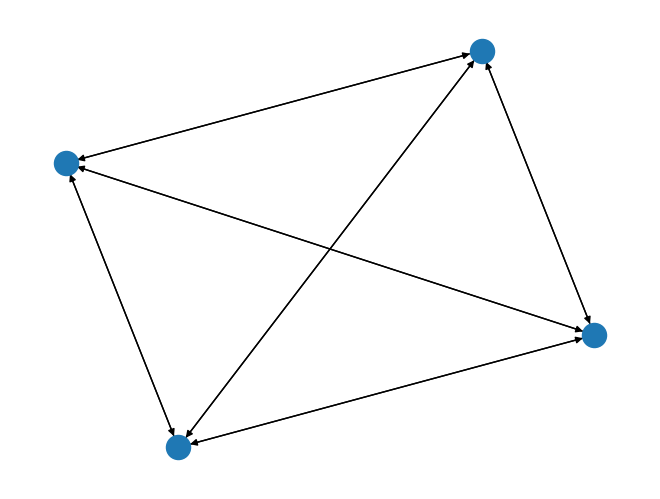

In [60]:
nx.draw(graph_product(C_2,C_2))

Nodes = 7 x 2 -> 14
(14, 9)
[[1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1.]]
(14, 14)
[[0. 1. 1. 2. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 2. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 1. 2. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 2. 1. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 1. 2. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 2. 1. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 1. 2. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 2. 1. 1. 0. 1. 0.]
 [0. 1. 0. 1. 1. 2. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 2. 1. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 1. 2. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 2. 1. 1. 0. 1. 0. 1. 0. 1. 0.]
 [

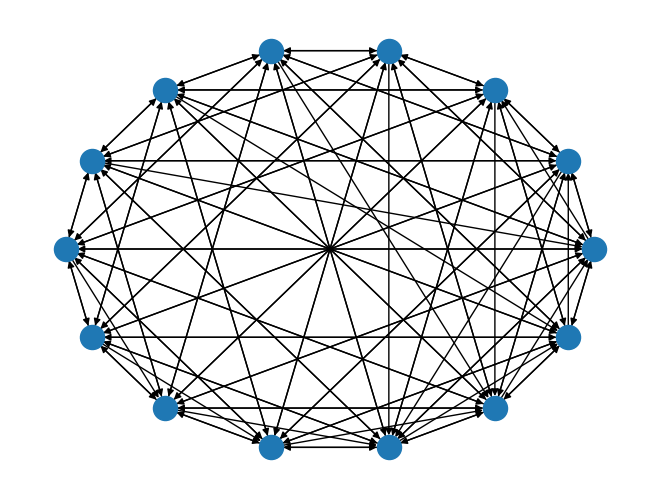

In [61]:
nx.draw_shell(graph_product(GX_A,C_2))

In [62]:
# hypthothesis: maybe we can get the number of generators from the matrix properties
def estimate_generators(G):
    M = nx.to_numpy_array(G)
    e_vals,e_vecs = np.linalg.eig(M)
    print(M.shape[0]-np.count_nonzero(e_vals))
    
estimate_generators(XG)

4


In [63]:
estimate_generators(YG)

4


In [64]:
estimate_generators(XY_sum)

8


In [65]:
estimate_generators(XY_prod)

9


In [67]:
[]+[]

[]

In [68]:
[],[]

([], [])

In [69]:
[],[]+[],[]

([], [], [])

In [70]:
[]+[],[]+[]

([], [])

In [76]:
# let's try again now that we've fixed our product
XY_prod_pres = make_presentation(graph_product(XG,YG))

Nodes = 9 x 13 -> 117
(117, 22)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
(117, 117)
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [77]:
XY_prod_pres

{'generators': [0, 1, 12, 13, 14, 25, 26, 27, 38],
 'relations': [((0, 6), (0, 2)),
  ((1, 1), (0, 1)),
  ((12, 4), (12, 1)),
  ((13, 1), (0, 1)),
  ((14, 1), (0, 1)),
  ((25, 1), (12, 1)),
  ((26, 1), (0, 1)),
  ((27, 1), (0, 1)),
  ((38, 1), (12, 1))]}

In [78]:
standardize_presentation(XY_prod_pres)

{'generator_count': 9,
 'generators': [0, 1, 12, 13, 14, 25, 26, 27, 38],
 'substitutions': {21: 3,
  4: 1,
  23: 8,
  13: 1,
  19: 1,
  26: 8,
  34: 1,
  43: 1,
  53: 8},
 'relation_pairs': {21: (0, 6),
  3: (0, 2),
  4: (1, 1),
  1: (0, 1),
  23: (12, 4),
  8: (12, 1),
  13: (13, 1),
  19: (14, 1),
  26: (25, 1),
  34: (26, 1),
  43: (27, 1),
  53: (38, 1)},
 'max_depth': 6,
 'max_steps': 53}